In [249]:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

In [250]:
url = "C:\\Users\\Asus\\Downloads\\fifa_players.csv2\\fifa_players.csv"
data_raw = pd.read_csv(url)

Таблица содержит данные о футболистах (гражданство, рос, вес, позиции на поле, трансферная стоимость, зарплата, общий рейтинг и потенциал в FIFA, характеристика в FIFA)
Полностью таблица не нужна.

In [251]:
data_raw.shape

(17954, 51)

In [252]:
pd.set_option('display.max_columns', None)  # показывать все столбцы

In [253]:
data_raw = data_raw.drop(data_raw.columns[13:51], axis = 1)
data_raw = data_raw.drop(data_raw.columns[[1, 2, 5]], axis = 1)

In [254]:
data_raw

,name,age,height_cm,positions,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot
0,L. Messi,31,170.18,"CF,RW,ST",Argentina,94,94,110500000.0,565000.0,Left
1,C. Eriksen,27,154.94,"CAM,RM,CM",Denmark,88,89,69500000.0,205000.0,Right
2,P. Pogba,25,190.50,"CM,CAM",France,88,91,73000000.0,255000.0,Right
3,L. Insigne,27,162.56,"LW,ST",Italy,88,88,62000000.0,165000.0,Right
4,K. Koulibaly,27,187.96,CB,Senegal,88,91,60000000.0,135000.0,Right
...,...,...,...,...,...,...,...,...,...,...
17949,R. McKenzie,25,175.26,"RM,CAM,CM",Scotland,67,70,975000.0,3000.0,Right
17950,M. Sipľak,23,182.88,LB,Slovakia,59,67,190000.0,1000.0,Left
17951,J. Bekkema,22,185.42,GK,Netherlands,59,67,170000.0,1000.0,Right
17952,A. Al Yami,21,175.26,"ST,LM",Saudi Arabia,59,71,280000.0,4000.0,Right


In [255]:
data_raw.shape

(17954, 10)

In [256]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            17954 non-null  object 
 1   age             17954 non-null  int64  
 2   height_cm       17954 non-null  float64
 3   positions       17954 non-null  object 
 4   nationality     17954 non-null  object 
 5   overall_rating  17954 non-null  int64  
 6   potential       17954 non-null  int64  
 7   value_euro      17699 non-null  float64
 8   wage_euro       17708 non-null  float64
 9   preferred_foot  17954 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 1.4+ MB


 0   name             
 1   age               
 2   height_cm             
 3   positions - позиции, на которых играет футболист (номинальный)      
 4   nationality - национальность игрока (номинальный)     
 5   overall_rating    
 6   potential         
 7   value_euro      
 8   wage_euro       
 9  preferred_foot - рабочая нога (бинарный)

In [257]:
data_raw['positions'] = data_raw['positions'].astype('category')
data_raw['nationality'] = data_raw['nationality'].astype('category')
data_raw['preferred_foot'] = data_raw['preferred_foot'].astype('category')

In [258]:
data_raw['positions'].dtype

CategoricalDtype(categories=['CAM', 'CAM,CDM', 'CAM,CDM,CM', 'CAM,CDM,CM,RM',
                  'CAM,CDM,RM', 'CAM,CDM,RM,CM', 'CAM,CF', 'CAM,CF,CM',
                  'CAM,CF,CM,RM', 'CAM,CF,LM',
                  ...
                  'ST,RW,CAM', 'ST,RW,CF', 'ST,RW,CF,RM', 'ST,RW,LM',
                  'ST,RW,LM,LW', 'ST,RW,LW', 'ST,RW,LW,CAM', 'ST,RW,LW,CF',
                  'ST,RW,RM', 'ST,RWB,RM'],
, ordered=False)

In [259]:
data_raw['nationality'].dtype

CategoricalDtype(categories=['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
                  'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia',
                  'Austria',
                  ...
                  'United Arab Emirates', 'United States', 'Uruguay',
                  'Uzbekistan', 'Venezuela', 'Vietnam', 'Wales', 'Yemen',
                  'Zambia', 'Zimbabwe'],
, ordered=False)

In [260]:
data_raw['preferred_foot'].dtype

CategoricalDtype(categories=['Left', 'Right'], ordered=False)

информация о числовых признаках

In [261]:
data_raw.describe()

,age,height_cm,overall_rating,potential,value_euro,wage_euro
count,17954.000000,17954.000000,17954.000000,17954.000000,1.769900e+04,17708.000000
mean,25.565445,174.946921,66.240169,71.430935,2.479280e+06,9902.134628
std,4.705708,14.029449,6.963730,6.131339,5.687014e+06,21995.593750
min,17.000000,152.400000,47.000000,48.000000,1.000000e+04,1000.000000
25%,22.000000,154.940000,62.000000,67.000000,3.250000e+05,1000.000000
50%,25.000000,175.260000,66.000000,71.000000,7.000000e+05,3000.000000
75%,29.000000,185.420000,71.000000,75.000000,2.100000e+06,9000.000000
max,46.000000,205.740000,94.000000,95.000000,1.105000e+08,565000.000000


In [262]:
data_raw.describe(include=['category'])

,positions,nationality,preferred_foot
count,17954,17954,17954
unique,890,160,2
top,CB,England,Right
freq,2243,1658,13781


Пропущенные значения

In [263]:
data_raw.isnull().sum()

name                0
age                 0
height_cm           0
positions           0
nationality         0
overall_rating      0
potential           0
value_euro        255
wage_euro         246
preferred_foot      0
dtype: int64

In [264]:
data_raw = data_raw.dropna()

In [265]:
data_raw.isnull().sum()

name              0
age               0
height_cm         0
positions         0
nationality       0
overall_rating    0
potential         0
value_euro        0
wage_euro         0
preferred_foot    0
dtype: int64

In [266]:
data_raw.set_index(data_raw.columns[0], inplace = True)

In [267]:
data_raw.index

Index(['L. Messi', 'C. Eriksen', 'P. Pogba', 'L. Insigne', 'K. Koulibaly',
       'V. van Dijk', 'K. Mbappé', 'S. Agüero', 'M. Neuer', 'E. Cavani',
       ...
       'Cristiano Ronaldo', 'J. Serra', 'A. Rodriguez', 'A. Calisir',
       'R. Torres', 'R. McKenzie', 'M. Sipľak', 'J. Bekkema', 'A. Al Yami',
       'Júnior Brumado'],
      dtype='object', name='name', length=17699)

ГРАФИКИ

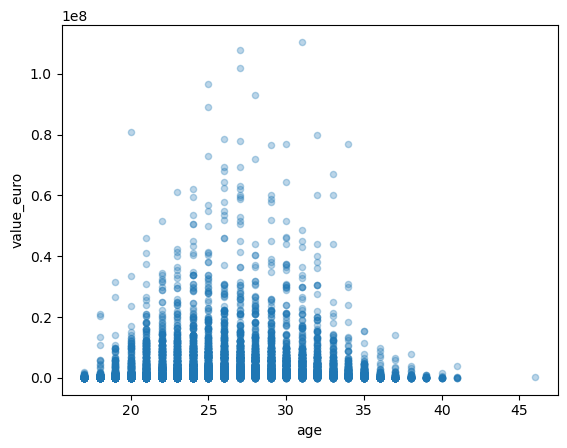

In [268]:
data_raw.plot(kind='scatter', x='age', y='value_euro', alpha=0.3)
pass

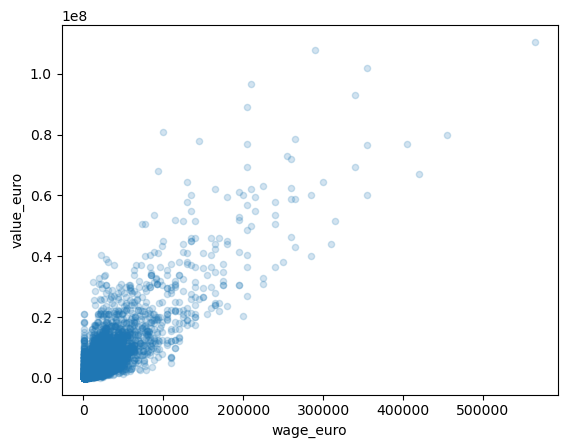

In [269]:
data_raw.plot(kind='scatter', x='wage_euro', y='value_euro', alpha=0.2)
pass

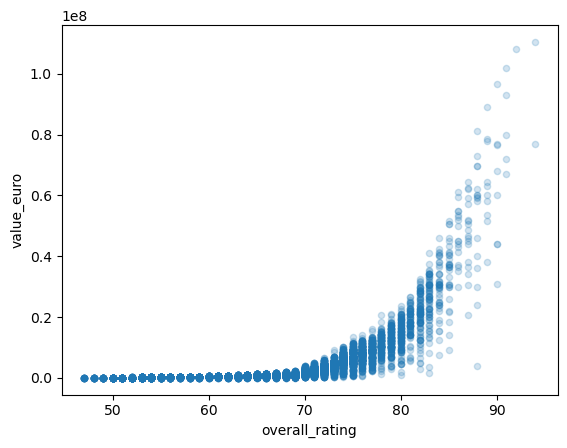

In [270]:
data_raw.plot(kind='scatter', x='overall_rating', y='value_euro', alpha=0.2)
pass

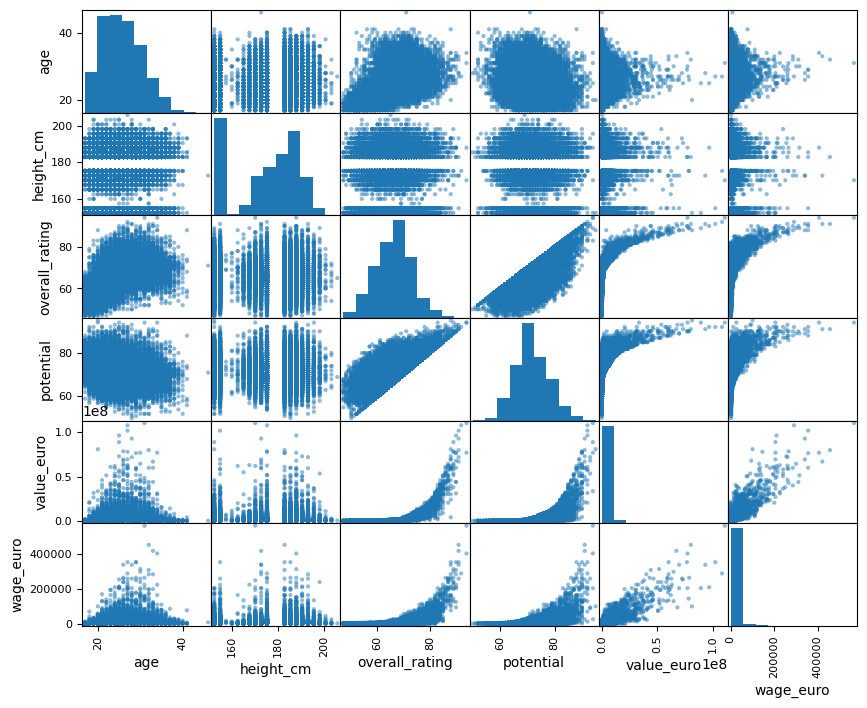

In [271]:
pd.plotting.scatter_matrix(data_raw, figsize = (10, 8))
pass

наблюдаются аномалии с ростом игроков (height_cm признак)

In [272]:
data_raw['value_euro'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005       40000.0
0.010       50000.0
0.050      100000.0
0.100      150000.0
0.500      700000.0
0.900     6500000.0
0.950    10000000.0
0.990    28000000.0
0.995    37000000.0
Name: value_euro, dtype: float64

In [273]:
data_raw['age'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    17.0
0.010    18.0
0.050    19.0
0.100    20.0
0.500    25.0
0.900    32.0
0.950    34.0
0.990    37.0
0.995    38.0
Name: age, dtype: float64

In [274]:
data_raw['wage_euro'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005      1000.0
0.010      1000.0
0.050      1000.0
0.100      1000.0
0.500      3000.0
0.900     24000.0
0.950     40000.0
0.990    105000.0
0.995    140000.0
Name: wage_euro, dtype: float64

In [275]:
data_raw['overall_rating'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    49.0
0.010    50.0
0.050    54.0
0.100    57.0
0.500    66.0
0.900    75.0
0.950    78.0
0.990    83.0
0.995    85.0
Name: overall_rating, dtype: float64

In [276]:
data_raw['height_cm'].quantile([0.005,.01,.05,.1,0.15,.5,.9,.95,.99,.995])

0.005    152.40
0.010    152.40
0.050    152.40
0.100    152.40
0.150    154.94
0.500    175.26
0.900    190.50
0.950    193.04
0.990    195.58
0.995    198.12
Name: height_cm, dtype: float64

In [277]:
rows_to_drop = data_raw[
    (data_raw['value_euro'] < data_raw['value_euro'].quantile(0.005)) | (data_raw['value_euro'] > data_raw['value_euro'].quantile(0.995)) |
    (data_raw['age']  < data_raw['age' ].quantile(0.005)) | (data_raw['age']  > data_raw['age'].quantile(0.995))].index
data = data_raw.drop(rows_to_drop)
data.shape

(17489, 9)

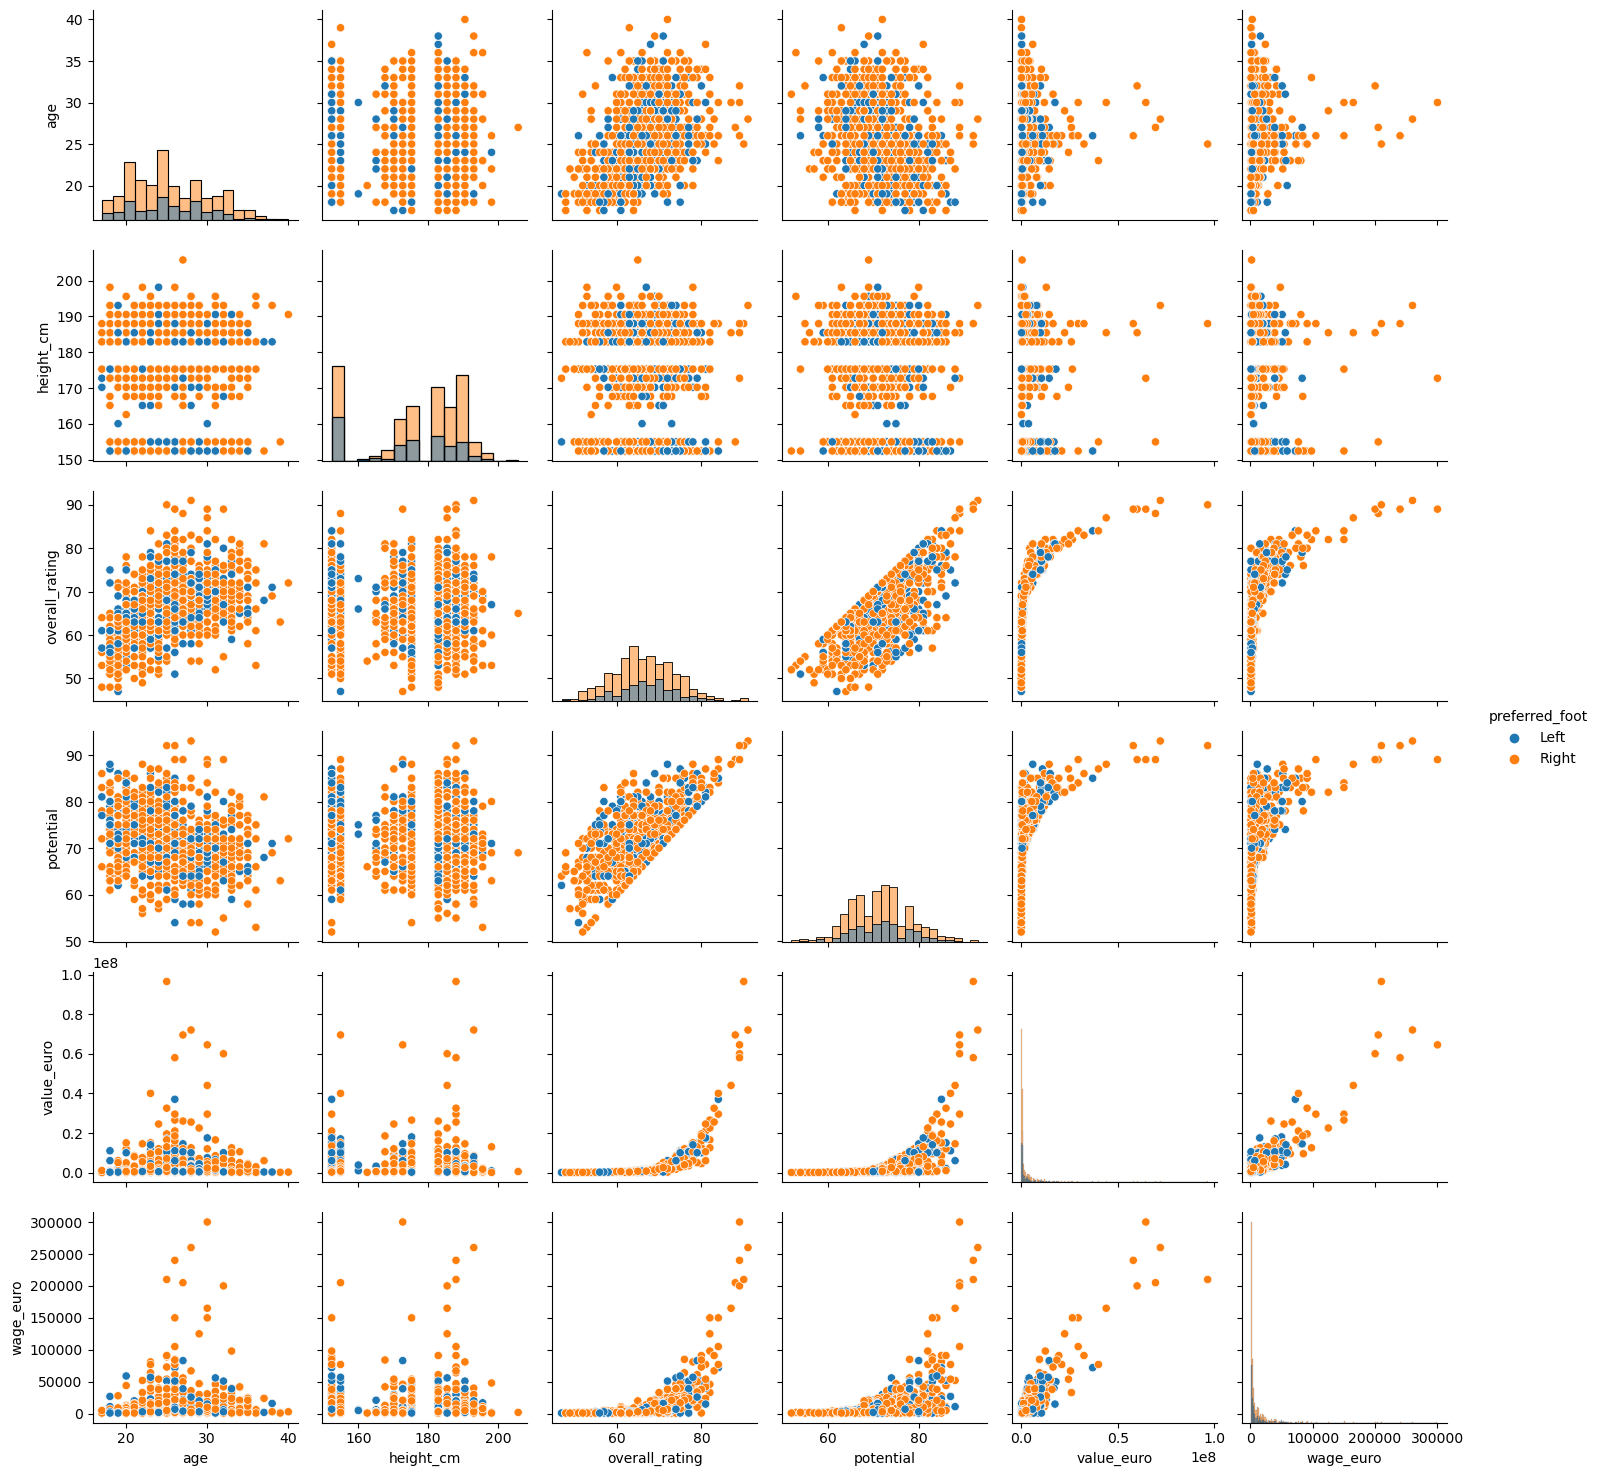

In [278]:
sns.pairplot(data_raw.sample(1000), hue='preferred_foot', diag_kind='hist')
pass

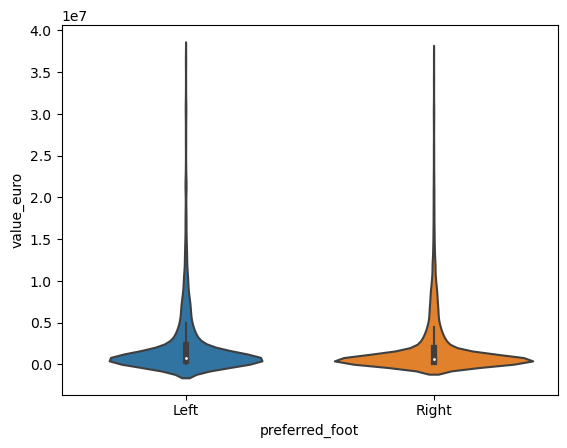

In [279]:
sns.violinplot(x="preferred_foot", y="value_euro", data=data)
pass

Корреляция

In [280]:
corr_mat = data.corr(numeric_only=True)
corr_mat

,age,height_cm,overall_rating,potential,value_euro,wage_euro
age,1.000000,0.055532,0.483946,-0.262591,0.101104,0.187335
height_cm,0.055532,1.000000,0.038551,0.010827,0.009570,0.019008
overall_rating,0.483946,0.038551,1.000000,0.627186,0.696572,0.618338
potential,-0.262591,0.010827,0.627186,1.000000,0.625912,0.498770
value_euro,0.101104,0.009570,0.696572,0.625912,1.000000,0.792202
wage_euro,0.187335,0.019008,0.618338,0.498770,0.792202,1.000000


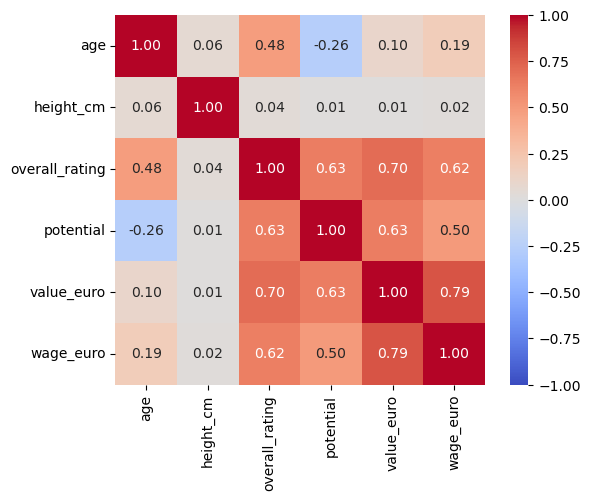

In [281]:
sns.heatmap(corr_mat, square=True, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')
pass

In [282]:
corr_mat > 0.5

,age,height_cm,overall_rating,potential,value_euro,wage_euro
age,True,False,False,False,False,False
height_cm,False,True,False,False,False,False
overall_rating,False,False,True,True,True,True
potential,False,False,True,True,True,False
value_euro,False,False,True,True,True,True
wage_euro,False,False,True,False,True,True


выборка

In [283]:
X = data_raw.drop(['value_euro','height_cm','age', 'nationality','positions'], axis=1)
y = data_raw['value_euro']

In [284]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(13274, 4425)

бинаризация

In [285]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='if_binary', sparse=False)
enc.fit(X_train[['preferred_foot']])

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(drop='if_binary', sparse=False, sparse_output=False)

In [286]:
dummies = pd.DataFrame(enc.transform(X_train[['preferred_foot']]),
                       columns=enc.get_feature_names_out(), index=X_train.index)
dummies.head()

,preferred_foot_Right
name,
A. Oxborough,1.0
T. Haye,1.0
Jacson Zonta,1.0
F. Affolter,1.0
G. Kuświk,1.0


In [287]:
X_train = pd.concat((X_train, dummies), axis=1).drop(['preferred_foot'], axis=1)

In [288]:
X_train.head()

,overall_rating,potential,wage_euro,preferred_foot_Right
name,,,,
A. Oxborough,61,76,2000.0,1.0
T. Haye,65,69,1000.0,1.0
Jacson Zonta,74,74,13000.0,1.0
F. Affolter,64,66,2000.0,1.0
G. Kuświk,66,66,3000.0,1.0


In [289]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)

In [290]:
X_train

,overall_rating,potential,wage_euro,preferred_foot_Right
name,,,,
A. Oxborough,-0.752480,0.738315,-0.364306,0.552808
T. Haye,-0.179824,-0.402839,-0.410803,0.552808
Jacson Zonta,1.108655,0.412271,0.147163,0.552808
F. Affolter,-0.322988,-0.891905,-0.364306,0.552808
G. Kuświk,-0.036659,-0.891905,-0.317809,0.552808
...,...,...,...,...
Y. Abe,-0.036659,-0.891905,-0.317809,0.552808
Luís Cortez,0.106505,-0.239817,-0.364306,0.552808
G. Botos,-1.754630,0.575293,-0.410803,0.552808


In [291]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [292]:
y_train_predict = model.predict(X_train)

In [293]:
y_train

name
A. Oxborough       450000.0
T. Haye            700000.0
Jacson Zonta      2800000.0
F. Affolter        450000.0
G. Kuświk          575000.0
                    ...    
Y. Abe              90000.0
Luís Cortez        975000.0
G. Botos           150000.0
Mauro Cildinho    1100000.0
M. Loum           5500000.0
Name: value_euro, Length: 13274, dtype: float64

In [294]:
y_train_predict

array([1216640.43473317,  398611.96634241, 4231807.53638996, ...,
        194753.44490634, 3986194.17438576, 4387599.97346841])

In [295]:
RSS = ((y_train_predict - y_train)**2).sum()
RSS/N_train, (RSS/N_train)**.5

(7307628087322.484, 2703262.4895341713)

In [296]:
dummies = pd.DataFrame(enc.transform(X_test[['preferred_foot']]),
                       columns=enc.get_feature_names_out(), index=X_test.index)
X_test = pd.concat((X_test, dummies), axis=1).drop(['preferred_foot'], axis=1)


# Масштабирование:
X_test = pd.DataFrame(scaler.transform(X_test),
                      columns=X_test.columns, index=X_test.index)

In [297]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

In [298]:
from sklearn.metrics import mean_squared_error, r2_score

MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

MSE_train, MSE_test, R2_train, R2_test

(7307628087322.484, 7220101329707.428, 0.7696279434542592, 0.7888718165115964)

In [299]:
model.score(X_train, y_train) # Коэффициент детерминации R^2

0.7696279434542592

In [300]:
model.score(X_test, y_test)

0.7888718165115964

In [301]:
MSE_train = ((y_train_predict - y_train)**2).mean()
MSE_test  = ((y_test_predict - y_test)**2).mean()
MSE_train, MSE_test

(7307628087322.484, 7220101329707.428)

In [302]:
RMSE_train = (MSE_train)**(.5)
RMSE_test = (MSE_test)**(.5)
RMSE_train, RMSE_test

(2703262.4895341713, 2687024.623948844)

In [303]:
RMSE_table = pd.DataFrame(columns=('train', 'test'))
RMSE_table.loc['Linear Regression, all features', :] = (RMSE_train, RMSE_test)

In [304]:
RMSE_table

,train,test
"Linear Regression, all features",2703262.489534,2687024.623949


In [305]:
R2_table = pd.DataFrame(columns=('train', 'test'))
R2_table.loc['Linear Regression, all features', :] = (R2_train, R2_test)
R2_table

,train,test
"Linear Regression, all features",0.769628,0.788872


Только от рейтинга

In [306]:
model = LinearRegression()
model.fit(X_train[['overall_rating']], y_train)

y_train_predict = model.predict(X_train[['overall_rating']])
y_test_predict  = model.predict(X_test[['overall_rating']])

In [307]:
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5

In [308]:
RMSE_table.loc['Linear Regression, overall_rating', :] = (RMSE_train, RMSE_test)
RMSE_table

,train,test
"Linear Regression, all features",2703262.489534,2687024.623949
"Linear Regression, overall_rating",4359444.981355,4566765.788294


In [309]:
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)
R2_table.loc['Linear Regression, overall', :] = (R2_train, R2_test)
R2_table

,train,test
"Linear Regression, all features",0.769628,0.788872
"Linear Regression, overall",0.400877,0.390154


Только от зарплаты


In [310]:
model = LinearRegression()
model.fit(X_train[['wage_euro']], y_train)

y_train_predict = model.predict(X_train[['wage_euro']])
y_test_predict  = model.predict(X_test[['wage_euro']])

In [311]:
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5

In [312]:
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)
R2_table.loc['Linear Regression, wage_euro', :] = (R2_train, R2_test)
R2_table

,train,test
"Linear Regression, all features",0.769628,0.788872
"Linear Regression, overall",0.400877,0.390154
"Linear Regression, wage_euro",0.725881,0.754601


# Выводы 

Использование мнк дает неплохой результат. Лучшая по модель по одному признаку получается, когда этот признак - зарплата игрока. Это объясняется самым большим значением коэф корреляции зарплаты и стоимости среди всех пар. 

без зарплаты

In [313]:
model = LinearRegression()
model.fit(X_train[['overall_rating', 'potential', 'preferred_foot_Right']], y_train)

y_train_predict = model.predict(X_train[['overall_rating', 'potential', 'preferred_foot_Right']])
y_test_predict  = model.predict(X_test[['overall_rating', 'potential', 'preferred_foot_Right']])

In [314]:
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5

In [315]:
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)
R2_table.loc['Linear Regression, без зарплаты', :] = (R2_train, R2_test)
R2_table

,train,test
"Linear Regression, all features",0.769628,0.788872
"Linear Regression, overall",0.400877,0.390154
"Linear Regression, wage_euro",0.725881,0.754601
"Linear Regression, без зарплаты",0.451491,0.434784


Random forest

In [316]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=200) # по умолчанию n_estimators=100
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

In [317]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

In [318]:
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

In [319]:
RMSE_table.loc['Random Forest', :] = (RMSE_train, RMSE_test)
RMSE_table

,train,test
"Linear Regression, all features",2703262.489534,2687024.623949
"Linear Regression, overall_rating",4359444.981355,4566765.788294
Random Forest,620354.113856,1526457.205436


In [320]:
R2_table.loc['Random Forest', :] = (R2_train, R2_test)
R2_table

,train,test
"Linear Regression, all features",0.769628,0.788872
"Linear Regression, overall",0.400877,0.390154
"Linear Regression, wage_euro",0.725881,0.754601
"Linear Regression, без зарплаты",0.451491,0.434784
Random Forest,0.987868,0.931865


In [321]:
importances = model.feature_importances_
importances

array([0.87765302, 0.0878647 , 0.03142297, 0.00305931])

In [322]:
np.sum(importances)

1.0

In [323]:
importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
importances

overall_rating          0.877653
potential               0.087865
wage_euro               0.031423
preferred_foot_Right    0.003059
dtype: float64

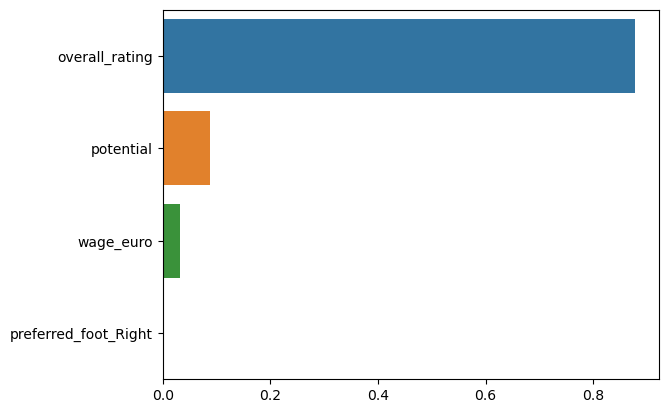

In [324]:
sns.barplot(y=importances.index, x=importances, orient="h")
pass